In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

xTrain = xTrain.astype('float32') / 255.0
xTest = xTest.astype('float32') / 255.0

yTrain = to_categorical(yTrain, 10)
yTest = to_categorical(yTest, 10)

print("xTrain: ", xTrain.shape)
print("xTest: ", xTest.shape)
print("yTrain: ", yTrain.shape)
print("yTest: ", yTest.shape)

xTrain:  (60000, 28, 28)
xTest:  (10000, 28, 28)
yTrain:  (60000, 10)
yTest:  (10000, 10)


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(xTrain, yTrain, epochs = 50, batch_size = 32, validation_split = 0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8894 - loss: 0.3616 - val_accuracy: 0.9828 - val_loss: 0.0547
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9830 - loss: 0.0551 - val_accuracy: 0.9873 - val_loss: 0.0431
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9889 - loss: 0.0347 - val_accuracy: 0.9881 - val_loss: 0.0412
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9921 - loss: 0.0242 - val_accuracy: 0.9874 - val_loss: 0.0432
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9940 - loss: 0.0181 - val_accuracy: 0.9863 - val_loss: 0.0494
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9947 - loss: 0.0157 - val_accuracy: 0.9887 - val_loss: 0.0411
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9964 - loss: 0.0096 - val_accuracy: 0.9869 - val_loss: 0.0504
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9970 - loss: 0.0092 

In [9]:
testLoss, testAcc = model.evaluate(xTest, yTest)

print(f"Test Acuracy: {testAcc * 100:.2f}%")
print(f"Test Loss: {testLoss * 100:.2f}%")

model.summary()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9851 - loss: 0.1044
Test Acuracy: 98.78%
Test Loss: 8.65%


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9851 - loss: 0.1044
Test Accuracy: 98.78%
Test Loss: 0.0865
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


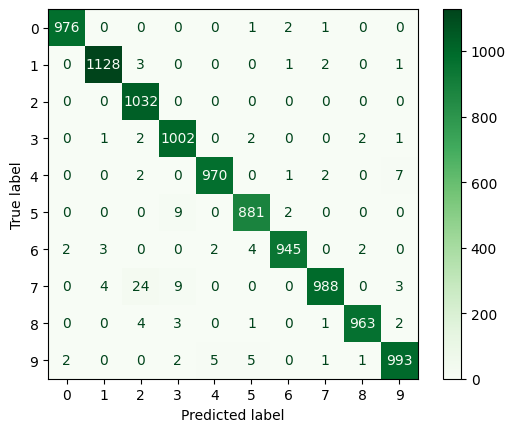

In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testLoss, testAcc = model.evaluate(xTest, yTest)
print(f"Test Accuracy: {testAcc * 100:.2f}%")
print(f"Test Loss: {testLoss:.4f}")

yPred_probs = model.predict(xTest)  # probabilities

yPred_classes = np.argmax(yPred_probs, axis=1)
yTrue_classes = np.argmax(yTest, axis=1)  # for one-hot labels

cm = confusion_matrix(yTrue_classes, yPred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Greens')